In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target  # median house value in $100,000s

# For simplicity, let's use just one feature for visualization: 'MedInc' (Median Income)
X_single_feature = X[['MedInc']]  # using only 'MedInc' feature

print(X_single_feature.head())
print(y[:5])


   MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462
[4.526 3.585 3.521 3.413 3.422]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X_single_feature, y, test_size=0.2, random_state=42
)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 0.63
Mean Squared Error (MSE): 0.71
R-squared (R²): 0.46


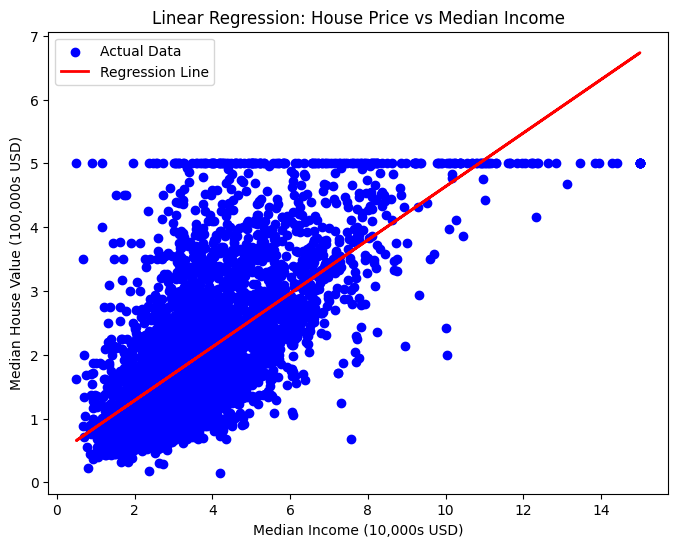

Intercept: 0.44
Coefficient: 0.42


In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Median Income (10,000s USD)')
plt.ylabel('Median House Value (100,000s USD)')
plt.title('Linear Regression: House Price vs Median Income')
plt.legend()
plt.show()

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
